## Loading Necessary Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image

## Model Hyperparameters

In [2]:
IMG_SIZE = (224, 224)
NUM_CLASSES = 2
LEARNING_RATE = 0.001
BATCH_SIZE = 32
EPOCHS = 10

## Defining the model

In [3]:
def build_cnn_model(input_shape, num_classes):
    model = Sequential([
        # Convolutional Layer 1
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),

        # Convolutional Layer 2
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        # Flatten for Dense Layers
        Flatten(),

        # Dense Layers
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')  # Output layer
    ])
    return model

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
input_shape = (*IMG_SIZE, 3)  # Assuming 3 channels (RGB)
model = build_cnn_model(input_shape, NUM_CLASSES)
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,907,650 (91.20 MB)

 Trainable params: 23,907,650 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

## Loading personal dataset for waste classification

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/BSIT/Assignments/17/TECH405/W4/dataset/TRAIN',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/BSIT/Assignments/17/TECH405/W4/dataset/TEST',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # Do not shuffle to preserve order
)

Found 4337 images belonging to 2 classes.
Found 832 images belonging to 2 classes.


In [8]:
print(train_data.class_indices)
print(f"Number of classes: {len(train_data.class_indices)}")


{'O': 0, 'R': 1}
Number of classes: 2


## Training the model

In [9]:
history = model.fit(
    train_data,
    epochs=EPOCHS
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


136/136 ━━━━━━━━━━━━━━━━━━━━ 1619s 11s/step - accuracy: 0.6796 - loss: 2.9235
Epoch 2/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 46s 147ms/step - accuracy: 0.8044 - loss: 0.4511
Epoch 3/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 20s 140ms/step - accuracy: 0.8543 - loss: 0.3447
Epoch 4/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 21s 147ms/step - accuracy: 0.9121 - loss: 0.2477
Epoch 5/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 20s 141ms/step - accuracy: 0.9238 - loss: 0.2085
Epoch 6/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 21s 146ms/step - accuracy: 0.9616 - loss: 0.1316
Epoch 7/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 41s 146ms/step - accuracy: 0.9695 - loss: 0.1116
Epoch 8/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 40s 142ms/step - accuracy: 0.9741 - loss: 0.0924
Epoch 9/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 20s 141ms/step - accuracy: 0.9858 - loss: 0.0512
Epoch 10/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 21s 146ms/step - accuracy: 0.9891 - loss: 0.0401


## Evaluating the model on test data

In [11]:
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Saving the model
model.save('./cnn_model.h5')

26/26 ━━━━━━━━━━━━━━━━━━━━ 331s 13s/step - accuracy: 0.8399 - loss: 0.8664


Test Loss: 1.0763, Test Accuracy: 0.7897


26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 145ms/step


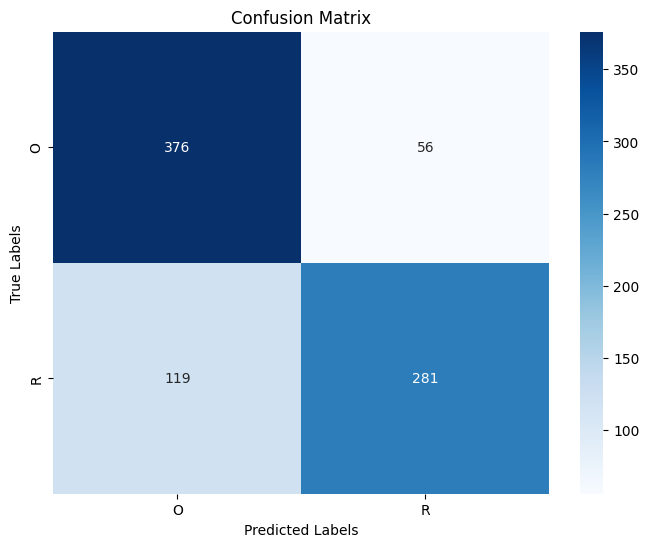

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_data.classes

conf_matrix = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_data.class_indices.keys(), yticklabels=test_data.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [13]:
# Precision, Recall, and F1-Score
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=test_data.class_indices.keys()))

Classification Report:
              precision    recall  f1-score   support

           O       0.76      0.87      0.81       432
           R       0.83      0.70      0.76       400

    accuracy                           0.79       832
   macro avg       0.80      0.79      0.79       832
weighted avg       0.80      0.79      0.79       832



In [14]:
# Testing on a Single Image
def predict_image(model, img_path, target_size):
    """
    Loads an image, preprocesses it, and makes a prediction using the model.

    Argumentss:
    - model: Previously trained Keras model.
    - img_path: Path to the image file.
    - target_size: Target size of the image as expected by the model.

    Returns:
    - Predicted class label and confidence score.
    """
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img) / 255.0  # Normalizing to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])  # Getting class index
    confidence = predictions[0][predicted_class]  # Getting confidence score

    return predicted_class, confidence

In [15]:
# Example usage for a single test image
img_path = '/content/drive/MyDrive/BSIT/Assignments/17/TECH405/W4/dataset/TEST/O/O_12572.jpg'
predicted_class, confidence = predict_image(model, img_path, IMG_SIZE)
print(f"Predicted Class: {predicted_class}, Confidence: {confidence:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class: 0, Confidence: 0.9932


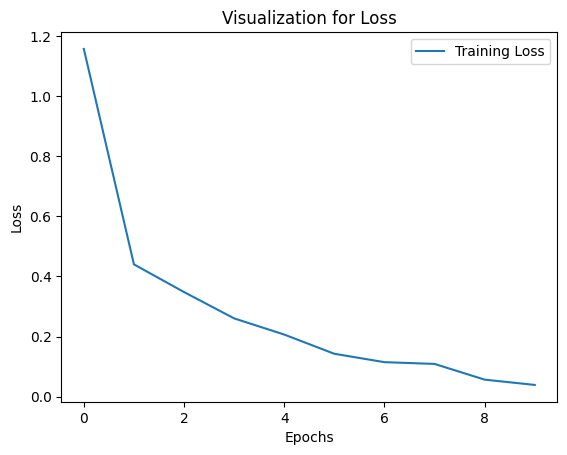

In [16]:
loss = history.history['loss']

plt.plot(loss, label='Training Loss')
plt.title('Visualization for Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
